<a href="https://colab.research.google.com/github/lanej5/mlb/blob/main/elo/offline_2022_06_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploring features and simple models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

pd.options.display.max_columns = None

In [7]:
gl = pd.read_parquet('/content/drive/My Drive/mlb/features/features.parquet')
team_ids = pd.read_csv('/content/drive/My Drive/mlb/features/team_ids.csv')

In [8]:
gl.head()

,game_id,date,visitor_id,home_id,visitor_L,home_L,date_index,RD,W,interleague,home_RD_10,home_RD_20,home_RD_30,home_RD_50,home_RD_100,home_win_pct_10,home_win_pct_20,home_win_pct_30,home_win_pct_50,home_win_pct_100,home_off_avg_5,home_off_obp_5,home_off_slg_5,home_def_avg_5,home_def_whip_5,home_def_era_5,home_off_avg_10,home_off_obp_10,home_off_slg_10,home_def_avg_10,home_def_whip_10,home_def_era_10,home_off_avg_20,home_off_obp_20,home_off_slg_20,home_def_avg_20,home_def_whip_20,home_def_era_20,home_off_avg_30,home_off_obp_30,home_off_slg_30,home_def_avg_30,home_def_whip_30,home_def_era_30,home_off_avg_50,home_off_obp_50,home_off_slg_50,home_def_avg_50,home_def_whip_50,home_def_era_50,home_off_avg_100,home_off_obp_100,home_off_slg_100,home_def_avg_100,home_def_whip_100,home_def_era_100,visitor_RD_10,visitor_RD_20,visitor_RD_30,visitor_RD_50,visitor_RD_100,visitor_win_pct_10,visitor_win_pct_20,visitor_win_pct_30,visitor_win_pct_50,visitor_win_pct_100,visitor_off_avg_5,visitor_off_obp_5,visitor_off_slg_5,visitor_def_avg_5,visitor_def_whip_5,visitor_def_era_5,visitor_off_avg_10,visitor_off_obp_10,visitor_off_slg_10,visitor_def_avg_10,visitor_def_whip_10,visitor_def_era_10,visitor_off_avg_20,visitor_off_obp_20,visitor_off_slg_20,visitor_def_avg_20,visitor_def_whip_20,visitor_def_era_20,visitor_off_avg_30,visitor_off_obp_30,visitor_off_slg_30,visitor_def_avg_30,visitor_def_whip_30,visitor_def_era_30,visitor_off_avg_50,visitor_off_obp_50,visitor_off_slg_50,visitor_def_avg_50,visitor_def_whip_50,visitor_def_era_50,visitor_off_avg_100,visitor_off_obp_100,visitor_off_slg_100,visitor_def_avg_100,visitor_def_whip_100,visitor_def_era_100
0,0,1990-04-09,5,2,AL,AL,1.0,3,1,0,-2.3,0.20,0.000000,-0.04,-0.36,0.5,0.60,0.566667,0.54,0.52,0.322034,0.396040,0.842367,0.257310,1.140351,3.157895,0.253049,0.338667,0.683179,0.284091,1.159091,3.988636,0.272727,0.360208,0.746199,0.243004,1.011782,2.902798,0.265672,0.346526,0.724635,0.249008,1.056548,3.026786,0.268524,0.346982,0.731688,0.258886,1.059242,3.103081,0.268532,0.342600,0.730215,0.265841,1.071618,3.055703,0.0,-0.90,-1.100000,-0.40,-0.14,0.4,0.40,0.366667,0.42,0.48,0.263158,0.345178,0.696055,0.301775,1.313609,3.514793,0.281899,0.358442,0.744198,0.292035,1.247788,3.185841,0.272069,0.344031,0.742005,0.297376,1.298834,3.896501,0.270192,0.330427,0.756389,0.283317,1.243830,4.051333,0.265889,0.337312,0.755971,0.271598,1.180473,3.642604,0.258667,0.336914,0.747580,0.256410,1.136852,3.485689
1,1,1990-04-09,11,0,AL,AL,1.0,-3,0,0,-0.7,-0.45,-0.933333,-0.42,-0.50,0.5,0.45,0.366667,0.48,0.48,0.240741,0.309392,0.685935,0.229299,1.031847,1.719745,0.218659,0.281915,0.631769,0.238938,1.132743,2.867257,0.231988,0.299346,0.663900,0.254438,1.122781,2.556213,0.233918,0.300088,0.662661,0.263054,1.155665,2.793103,0.252444,0.314525,0.702104,0.258348,1.096661,2.862917,0.248109,0.315320,0.700428,0.265951,1.091937,3.006961,-2.1,-1.05,-0.500000,-0.40,-0.08,0.2,0.40,0.466667,0.46,0.52,0.209877,0.250000,0.589506,0.308989,1.365169,4.095506,0.224615,0.265896,0.622819,0.274052,1.250729,3.463557,0.241481,0.296599,0.668450,0.250000,1.116071,3.174107,0.256158,0.317204,0.703411,0.246792,1.122409,3.091807,0.266162,0.326282,0.726981,0.249265,1.109347,3.190476,0.263561,0.330246,0.711732,0.238667,1.051936,2.966677
2,2,1990-04-09,23,3,AL,AL,1.0,1,1,0,-0.2,1.00,0.666667,0.68,0.38,0.5,0.65,0.633333,0.62,0.59,0.253165,0.338798,0.712216,0.222222,0.833333,2.500000,0.239264,0.307692,0.648183,0.226415,0.915094,3.056604,0.249622,0.314363,0.669885,0.208524,0.908676,2.589041,0.261044,0.330349,0.708863,0.220528,0.957317,2.716463,0.256611,0.321758,0.697359,0.209518,0.934487,2.569839,0.261743,0.318856,0.707335,0.235801,1.010705,2.850134,3.7,2.60,1.566667,0.36,-0.03,0.6,0.70,0.600000,0.52,0.45,0.303371,0.379808,0.801156,0.208861,1.063291,1.708861,0.265672,0.359296,0.735416,0.213836,0.952830,1.867925,0.268256,0.339450,0.743324,0.246696,1.022026,2.339207,0.266667,0.336538,0.737533,0.263056,1.015474,2.689555,0.258007,0.331942,0.715097,0.273249,1.067738,3.

In [21]:
y = gl['W']
X = gl.drop(columns=['RD', 'W', 'game_id', 'date', 'visitor_id', 'home_id', 'date_index'])

In [22]:
X_h = X[[c for c in X.columns if c.startswith('home')]].copy().drop(columns=['home_L'])
X_h = X_h.rename(columns={c: c[4:] for c in X_h.columns})
X_v = X[[c for c in X.columns if c.startswith('visitor')]].copy().drop(columns=['visitor_L'])
X_v = X_v.rename(columns={c: c[7:] for c in X_v.columns})

In [24]:
X_v.head()

,_RD_10,_RD_20,_RD_30,_RD_50,_RD_100,_win_pct_10,_win_pct_20,_win_pct_30,_win_pct_50,_win_pct_100,_off_avg_5,_off_obp_5,_off_slg_5,_def_avg_5,_def_whip_5,_def_era_5,_off_avg_10,_off_obp_10,_off_slg_10,_def_avg_10,_def_whip_10,_def_era_10,_off_avg_20,_off_obp_20,_off_slg_20,_def_avg_20,_def_whip_20,_def_era_20,_off_avg_30,_off_obp_30,_off_slg_30,_def_avg_30,_def_whip_30,_def_era_30,_off_avg_50,_off_obp_50,_off_slg_50,_def_avg_50,_def_whip_50,_def_era_50,_off_avg_100,_off_obp_100,_off_slg_100,_def_avg_100,_def_whip_100,_def_era_100
0,0.0,-0.90,-1.100000,-0.40,-0.14,0.4,0.40,0.366667,0.42,0.48,0.263158,0.345178,0.696055,0.301775,1.313609,3.514793,0.281899,0.358442,0.744198,0.292035,1.247788,3.185841,0.272069,0.344031,0.742005,0.297376,1.298834,3.896501,0.270192,0.330427,0.756389,0.283317,1.243830,4.051333,0.265889,0.337312,0.755971,0.271598,1.180473,3.642604,0.258667,0.336914,0.747580,0.256410,1.136852,3.485689
1,-2.1,-1.05,-0.500000,-0.40,-0.08,0.2,0.40,0.466667,0.46,0.52,0.209877,0.250000,0.589506,0.308989,1.365169,4.095506,0.224615,0.265896,0.622819,0.274052,1.250729,3.463557,0.241481,0.296599,0.668450,0.250000,1.116071,3.174107,0.256158,0.317204,0.703411,0.246792,1.122409,3.091807,0.266162,0.326282,0.726981,0.249265,1.109347,3.190476,0.263561,0.330246,0.711732,0.238667,1.051936,2.966677
2,3.7,2.60,1.566667,0.36,-0.03,0.6,0.70,0.600000,0.52,0.45,0.303371,0.379808,0.801156,0.208861,1.063291,1.708861,0.265672,0.359296,0.735416,0.213836,0.952830,1.867925,0.268256,0.339450,0.743324,0.246696,1.022026,2.339207,0.266667,0.336538,0.737533,0.263056,1.015474,2.689555,0.258007,0.331942,0.715097,0.273249,1.067738,3.037887,0.259453,0.327367,0.720037,0.278076,1.088826,3.146818
3,-0.9,0.45,0.833333,0.64,-0.29,0.4,0.40,0.533333,0.58,0.47,0.263804,0.347368,0.709332,0.262195,0.987805,2.469512,0.250000,0.329897,0.694603,0.253731,0.985075,2.982090,0.269118,0.348777,0.766424,0.263785,1.032787,3.058122,0.275490,0.346354,0.772825,0.256890,0.998031,2.949803,0.277419,0.336161,0.765487,0.261792,1.011792,3.088443,0.268078,0.327646,0.730350,0.273467,1.061029,3.170009
4,0.5,0.30,0.633333,0.30,0.64,0.6,0.55,0.600000,0.52,0.54,0.245283,0.329609,0.776150,0.222222,0.962963,3.000000,0.269113,0.331476,0.768785,0.254491,1.050898,2.829341,0.274096,0.356858,0.807159,0.267164,1.034328,3.344776,0.271717,0.353832,0.829590,0.263682,1.017910,3.197015,0.261593,0.336859,0.777406,0.265294,1.058824,3.271765,0.258957,0.327064,0.753804,0.265698,1.051744,3.108140


In [25]:
X_d = X_h - X_v

In [26]:
X_d

,_RD_10,_RD_20,_RD_30,_RD_50,_RD_100,_win_pct_10,_win_pct_20,_win_pct_30,_win_pct_50,_win_pct_100,_off_avg_5,_off_obp_5,_off_slg_5,_def_avg_5,_def_whip_5,_def_era_5,_off_avg_10,_off_obp_10,_off_slg_10,_def_avg_10,_def_whip_10,_def_era_10,_off_avg_20,_off_obp_20,_off_slg_20,_def_avg_20,_def_whip_20,_def_era_20,_off_avg_30,_off_obp_30,_off_slg_30,_def_avg_30,_def_whip_30,_def_era_30,_off_avg_50,_off_obp_50,_off_slg_50,_def_avg_50,_def_whip_50,_def_era_50,_off_avg_100,_off_obp_100,_off_slg_100,_def_avg_100,_def_whip_100,_def_era_100
0,-2.3,1.10,1.100000,0.36,-0.22,0.1,0.20,0.200000,0.12,0.04,0.058876,0.050862,0.146312,-0.044465,-0.173259,-0.356898,-0.028850,-0.019775,-0.061019,-0.007944,-0.088697,0.802796,0.000658,0.016177,0.004194,-0.054372,-0.287052,-0.993703,-0.004521,0.016099,-0.031753,-0.034309,-0.187283,-1.024547,0.002635,0.009670,-0.024283,-0.012711,-0.121232,-0.539523,0.009866,0.005686,-0.017365,0.009431,-0.065233,-0.429986
1,1.4,0.60,-0.433333,-0.02,-0.42,0.3,0.05,-0.100000,0.02,-0.04,0.030864,0.059392,0.096429,-0.079689,-0.333321,-2.375760,-0.005956,0.016019,0.008950,-0.035114,-0.117986,-0.596300,-0.009493,0.002748,-0.004551,0.004438,0.006710,-0.617894,-0.022240,-0.017116,-0.040750,0.016262,0.033256,-0.298703,-0.013718,-0.011758,-0.024878,0.009083,-0.012687,-0.327559,-0.015452,-0.014926,-0.011304,0.027284,0.040001,0.040284
2,-3.9,-1.60,-0.900000,0.32,0.41,-0.1,-0.05,0.033333,0.10,0.14,-0.050206,-0.041010,-0.088940,0.013361,-0.229958,0.791139,-0.026408,-0.051604,-0.087233,0.012579,-0.037736,1.188679,-0.018635,-0.025086,-0.073439,-0.038172,-0.113351,0.249834,-0.005622,-0.006189,-0.028670,-0.042528,-0.058157,0.026908,-0.001397,-0.010184,-0.017738,-0.063731,-0.133251,-0.468048,0.002290,-0.008511,-0.012702,-0.042275,-0.078121,-0.296684
3,2.9,0.85,0.566667,0.60,1.40,0.4,0.35,0.200000,0.10,0.16,0.063974,0.041794,0.190942,-0.018148,-0.077091,0.423345,0.013006,0.014407,0.062996,-0.022737,-0.099110,-0.613668,-0.015917,-0.013350,-0.011367,-0.033016,-0.066169,-0.393391,-0.020358,-0.005289,-0.020225,-0.036752,-0.088851,-0.684255,-0.022214,-0.000376,-0.010308,-0.029511,-0.073734,-0.660212,-0.013770,0.000752,0.008030,-0.035443,-0.094562,-0.712524
4,-1.7,-0.15,-0.766667,-1.52,-1.04,-0.2,0.00,-0.100000,-0.12,-0.04,-0.036422,-0.037474,-0.123255,0.010036,0.159618,0.135484,-0.035984,-0.023784,-0.111400,-0.014743,0.122603,0.747946,-0.032666,-0.028774,-0.090103,-0.018661,0.052498,-0.232501,-0.029685,-0.030796,-0.119104,-0.010670,0.075463,0.218648,-0.022029,-0.018042,-0.098032,-0.006981,0.086663,0.399850,-0.000092,0.003190,-0.042641,-0.012226,0.069378,0.194076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73131,2.7,1.90,1.666667,1.42,0.58,0.5,0.40,0.233333,0.22,0.09,0.052110,0.072642,0.361043,-0.031418,-0.042928,-1.095199,0.059955,0.058311,0.246971,-0.014068,-0.004138,-0.323237,0.052897,0.044029,0.158746,-0.004720,-0.039118,-0.246977,0.017063,0.013742,0.087384,-0.010278,-0.076304,-0.640748,-0.007281,-0.003662,0.021760,-0.035760,-0.126215,-0.862599,0.000758,-0.002720,0.029524,-0.012827,-0.061516,-0.363000
73132,1.0,-0.90,-0.533333,-0.50,-1.35,-0.1,-0.25,-0.233333,-0.18,-0.19,-0.008212,-0.044028,-0.062981,-0.026708,-0.056703,-0.987365,-0.020822,-0.030502,-0.032088,-0.029816,-0.014614,-0.848796,-0.015896,-0.024454,-0.060949,-0.006699,0.003362,0.146309,-0.011805,-0.016373,-0.058182,-0.009006,-0.018068,-0.179666,-0.006462,-0.011041,-0.039023,-0.012482,-0.005242,-0.322911,-0.015641,-0.013142,-0.063811,0.006249,0.054047,0.172879
73133,-0.1,-2.50,-0.800000,-1.52,-1.38,0.1,-0.05,0.100000,-0.08,-0.09,0.021294,0.022880,0.137899,-0.030050,-0.149468,-1.385400,0.005107,0.021622,0.045405,-0.016112,-0.036952,-0.131498,-0.012125,-0.005077,-0.046458,0.000055,0.087158,0.910970,0.007052,0.011534,0.004554,-0.010527,0.002076,0.340622,-0.001855,-0.015335,-0.049172,0.011660,0.065314,0.572704,-0.013129,-0.015570,-0.058871,0.005

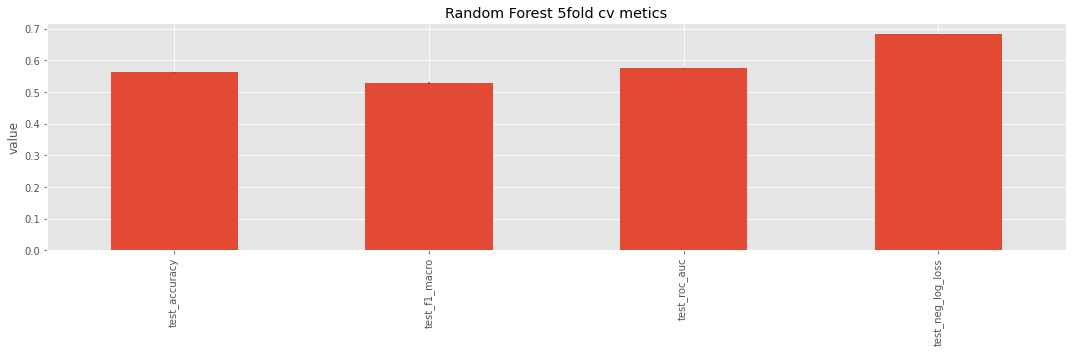

In [79]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=3,
    random_state=0
)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
res = cross_validate(
    clf,
    X_d_100,
    y,
    cv=cv,
    scoring=['accuracy', 'f1_macro', 'roc_auc', 'neg_log_loss']
)

data = [abs(x.mean()) for name, x in res.items() if name.startswith('test')]
metrics = pd.Series(
    data=data,
    index=[name for name in res.keys() if name.startswith('test')]
)
std = [np.std(x) for name, x in res.items() if name.startswith('test')]
fig, ax = plt.subplots(figsize=(15,5))
metrics.plot.bar(yerr=std, ax=ax)
ax.set_title("Random Forest 5-fold cv metics")
ax.set_ylabel("value")
fig.tight_layout()

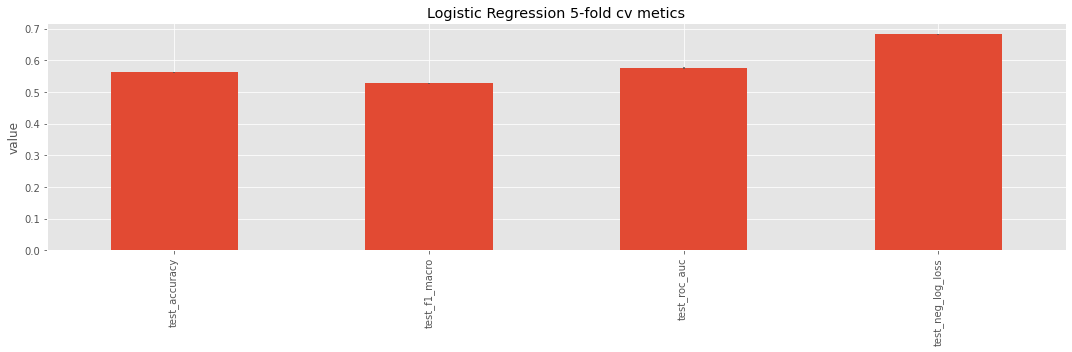

In [80]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(
    penalty='l2', # {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}
    random_state=42
)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
res = cross_validate(
    logistic_clf,
    X_d_100,
    y,
    cv=cv,
    scoring=['accuracy', 'f1_macro', 'roc_auc', 'neg_log_loss']
)

data = [abs(x.mean()) for name, x in res.items() if name.startswith('test')]
metrics = pd.Series(
    data=data,
    index=[name for name in res.keys() if name.startswith('test')]
)
std = [np.std(x) for name, x in res.items() if name.startswith('test')]
fig, ax = plt.subplots(figsize=(15,5))
metrics.plot.bar(yerr=std, ax=ax)
ax.set_title("Logistic Regression 5-fold cv metics")
ax.set_ylabel("value")
fig.tight_layout()

In [83]:
from sklearn.model_selection import train_test_split

X_d_100 = X_d[[c for c in X_d.columns if c.endswith('100')]]

X_train, X_test, y_train, y_test = train_test_split(X_d_100, y, stratify=y, train_size=.9, random_state=42)

clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=0)

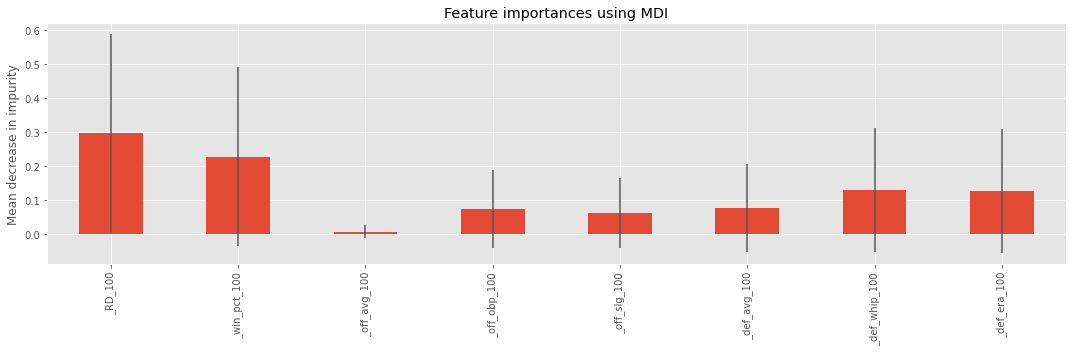

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_d_100.columns)

fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

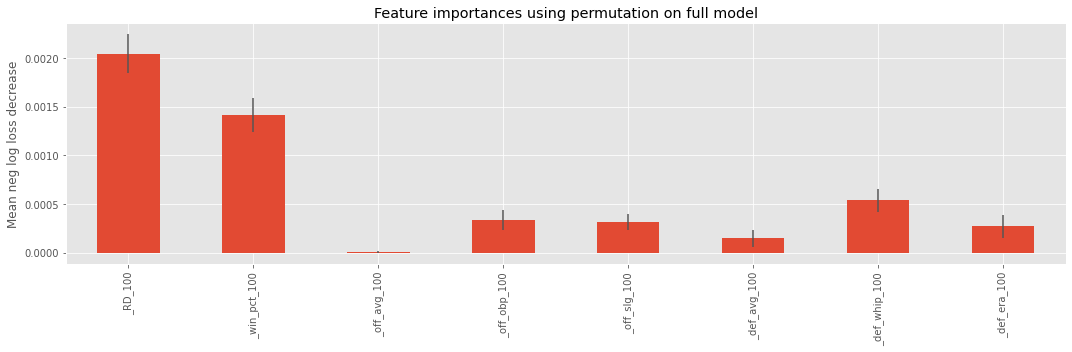

In [60]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, scoring='neg_log_loss', n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_d_100.columns)

fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean neg log loss decrease")
fig.tight_layout()
plt.show()

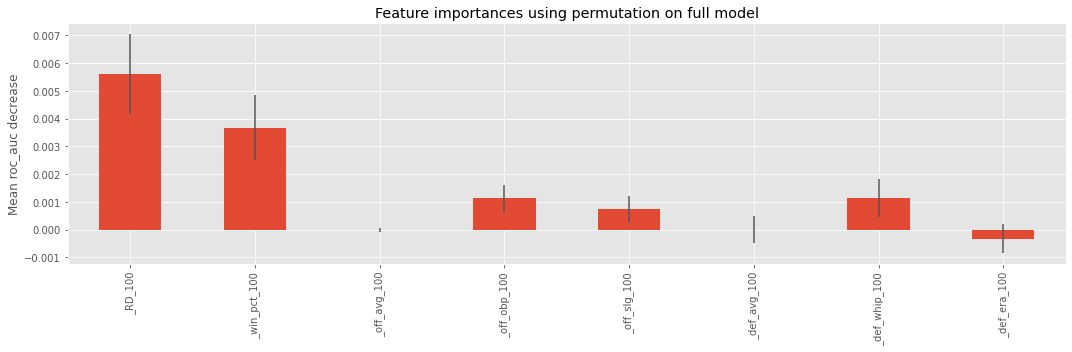

In [84]:
result = permutation_importance(
    clf, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_d_100.columns)

fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean roc_auc decrease")
fig.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

base_clf = RandomForestClassifier(
    random_state=42
)

clf = CalibratedClassifierCV(
    base_estimator=base_clf
)

cv = ShuffleSplit(
    n_splits=5,
    test_size=0.3,
    random_state=42
)

# n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
# min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,

distributions = {
    'n_estimators': list(range(10, 200)),
    'max_depth': list(range(2, 10)),
    'min_samples_split': list(range(2, 25)),
    'criterion': ['gini', 'entropy']
}

search = RandomizedSearchCV(
    estimator=base_clf,
    param_distributions=distributions,
    cv=cv,
    n_iter=5,
    scoring=['accuracy', 'f1_macro', 'roc_auc', 'neg_log_loss'],
    refit='neg_log_loss',
    verbose=3,
    error_score="raise",
    random_state=42
)

result = search.fit(X_d, y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=16, n_estimators=35; accuracy: (test=0.561) f1_macro: (test=0.527) neg_log_loss: (test=-0.682) roc_auc: (test=0.573) total time=   6.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=16, n_estimators=35; accuracy: (test=0.561) f1_macro: (test=0.528) neg_log_loss: (test=-0.682) roc_auc: (test=0.571) total time=   5.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=16, n_estimators=35; accuracy: (test=0.563) f1_macro: (test=0.534) neg_log_loss: (test=-0.682) roc_auc: (test=0.569) total time=   5.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=16, n_estimators=35; accuracy: (test=0.561) f1_macro: (test=0.529) neg_log_loss: (test=-0.682) roc_auc: (test=0.572) total time=   5.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=16, n_estimators=35; accuracy: (test=0.563) f1_macro: (test=0.533) neg_log_loss: (test=-0.682) r